In [89]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
import pickle
import torch
import dill
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pyloric import summary_stats, simulate, create_prior
from paper.pyloric_utils import compare_voltage_low_and_high_energy_trace
from sbi.analysis import pairplot, marginal_plot
from sbi.utils.posterior_ensemble import NeuralPosteriorEnsemble
from sbi.utils.sbiutils import ImproperEmpirical

# Panel B

In [3]:
xo = torch.as_tensor(
    [
        1.17085859e03,
        2.06036434e02,
        2.14307031e02,
        4.12842187e02,
        1.75970382e-01,
        1.83034085e-01,
        3.52597820e-01,
        4.11600328e-01,
        6.30544893e-01,
        4.81925781e02,
        2.56353125e02,
        2.75164844e02,
        4.20460938e01,
        2.35011166e-01,
        3.59104797e-02,
        2.5,
        2.5,
        2.5,
    ]
)
prior = create_prior().numerical_prior
lower = prior.support.base_constraint.lower_bound
upper = prior.support.base_constraint.upper_bound
limits = torch.stack([lower, upper]).T
p = create_prior()
names = p.sample((1,)).columns
unconstrained_prior = ImproperEmpirical(torch.rand(100, 31), torch.ones(100))

# Panel C

In [4]:
with open("/home/michael/Documents/tsnpe_collection/l5pc/results/p31_4/multiround/2022_05_14__00_13_47__multirun/0/inference_r1.pkl", "rb") as handle:
    inference_constrained_r1 = pickle.load(handle)
with open("/home/michael/Documents/tsnpe_collection/l5pc/results/p31_4/multiround/2022_05_14__00_13_47__multirun/0/inference_r5.pkl", "rb") as handle:
    inference_constrained_r5 = pickle.load(handle)
with open("/home/michael/Documents/tsnpe_collection/l5pc/results/p31_4/multiround/2022_05_14__13_21_13__multirun/0/inference_r10.pkl", "rb") as handle:
    inference_constrained_r10 = pickle.load(handle)
with open("/home/michael/Documents/tsnpe_collection/l5pc/results/p31_4/multiround/2022_05_14__23_49_35__multirun/0/inference_r13.pkl", "rb") as handle:
    inference_constrained_r13 = pickle.load(handle)

In [5]:
posterior_c_r1 = inference_constrained_r1[0].build_posterior().set_default_x(xo)
samples_c_r1 = posterior_c_r1.sample((10000,))

posterior_c_r5 = inference_constrained_r5[0].build_posterior().set_default_x(xo)
samples_c_r5 = posterior_c_r5.sample((10000,))

posterior_c_r10 = inference_constrained_r10[0].build_posterior().set_default_x(xo)
samples_c_r10 = posterior_c_r10.sample((10000,))

posterior_c_r13 = inference_constrained_r13[0].build_posterior().set_default_x(xo)
samples_c_r13 = posterior_c_r13.sample((10000,))

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

/home/michael/anaconda3/envs/tsnpe/lib/python3.8/site-packages/nflows/transforms/lu.py:80: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  outputs, _ = torch.triangular_solve(


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

# Panel A

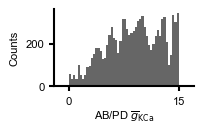

In [30]:
dim = 4
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.8, 1.0))
    _ = ax.hist(samples_c_r1[:, dim].numpy(), bins=50, range=(0, 15), color="k", alpha=0.6)
    ax.set_xticks([0, 15])
    ax.set_xlim([-2, 17])
    ax.set_ylabel("Counts")
    ax.set_xlabel(r"AB/PD $\overline{g}_{\mathrm{KCa}}$", labelpad=2)
    plt.savefig("../svg/panel_appendix4_a1.svg")

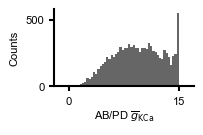

In [55]:
dim = 4
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.8, 1.0))
    _ = ax.hist(samples_c_r5[:, dim].numpy(), bins=50, range=(0, 15), color="k", alpha=0.6)
    ax.set_xticks([0, 15])
    ax.set_xlim([-2, 17])
    ax.set_ylabel("Counts")
    ax.set_xlabel(r"AB/PD $\overline{g}_{\mathrm{KCa}}$", labelpad=2)
    plt.savefig("../svg/panel_appendix4_a1.svg")

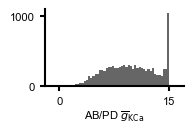

In [32]:
dim = 4
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.8, 1.0))
    _ = ax.hist(samples_c_r10[:, dim].numpy(), bins=50, range=(0, 15), color="k", alpha=0.6)
    ax.set_xticks([0, 15])
    ax.set_xlim([-2, 17])
    ax.set_xlabel(r"AB/PD $\overline{g}_{\mathrm{KCa}}$", labelpad=2)
    plt.savefig("../svg/panel_appendix4_a2.svg")

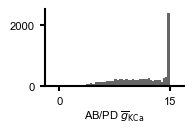

In [33]:
dim = 4
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.8, 1.0))
    _ = ax.hist(samples_c_r13[:, dim].numpy(), bins=50, range=(0, 15), color="k", alpha=0.6)
    ax.set_xticks([0, 15])
    ax.set_xlim([-2, 17])
    ax.set_xlabel(r"AB/PD $\overline{g}_{\mathrm{KCa}}$", labelpad=2)
    plt.savefig("../svg/panel_appendix4_a3.svg")

# Panel B

In [34]:
from torch.distributions import biject_to
bijection = biject_to(prior.support)

In [35]:
tf_samples_r5 = bijection.inv(samples_c_r5)
tf_samples_r10 = bijection.inv(samples_c_r10)
tf_samples_r13 = bijection.inv(samples_c_r13)

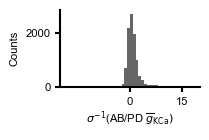

In [36]:
dim = 4
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.8, 1.0))
    _ = ax.hist(tf_samples_r5[:, dim].numpy(), bins=50, range=(-20, 20), color="k", alpha=0.6)
    ax.set_xticks([0, 15])
    ax.set_xlim([-20, 20])
    ax.set_ylabel("Counts")
    ax.set_xlabel(r"$\sigma^{-1}$(AB/PD $\overline{g}_{\mathrm{KCa}})$", labelpad=2)
    plt.savefig("../svg/panel_appendix4_b1.svg")

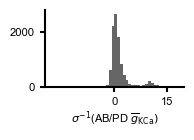

In [37]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.8, 1.0))
    _ = ax.hist(tf_samples_r10[:, dim].numpy(), bins=50, range=(-20, 20), color="k", alpha=0.6)
    ax.set_xticks([0, 15])
    ax.set_xlim([-20, 20])
    ax.set_xlabel(r"$\sigma^{-1}$(AB/PD $\overline{g}_{\mathrm{KCa}})$", labelpad=2)
    plt.savefig("../svg/panel_appendix4_b2.svg")

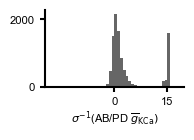

In [38]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.8, 1.0))
    _ = ax.hist(tf_samples_r13[:, dim].numpy(), bins=50, range=(-20, 20), color="k", alpha=0.6)
    ax.set_xticks([0, 15])
    ax.set_xlim([-20, 20])
    ax.set_xlabel(r"$\sigma^{-1}$(AB/PD $\overline{g}_{\mathrm{KCa}})$", labelpad=2)
    plt.savefig("../svg/panel_appendix4_b3.svg")

# Panel C

In [40]:
far_out_condition = samples_c_r5[:, 4] > 14.9
far_out_samples = samples_c_r5[far_out_condition]
far_out_log_probs_r1 = posterior_c_r1.log_prob(far_out_samples)
r5_log_probs = posterior_c_r5.log_prob(far_out_samples)

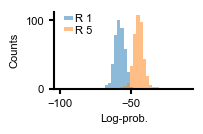

In [42]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.8, 1.0))
    _ = ax.hist(far_out_log_probs_r1.numpy(), bins=40, alpha=0.5, range=(-100,-10))
    _ = ax.hist(r5_log_probs.numpy(), bins=40, alpha=0.5, range=(-100,-10))
    ax.set_xlabel("Log-prob.")
    ax.set_ylabel("Counts")
    ax.legend(["R 1", "R 5"], handleheight=0.1, handletextpad=0.2, handlelength=0.8, labelspacing=0.1, loc="upper left", bbox_to_anchor=(0.0, 1.1))
    plt.savefig("../svg/panel_appendix4_c1.svg")

In [43]:
far_out_condition = samples_c_r10[:, 4] > 14.999
far_out_samples = samples_c_r10[far_out_condition]
far_out_log_probs_r5 = posterior_c_r5.log_prob(far_out_samples)
r10_log_probs = posterior_c_r10.log_prob(far_out_samples)

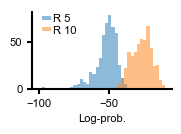

In [45]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.8, 1.0))
    _ = ax.hist(far_out_log_probs_r5.numpy(), bins=40, alpha=0.5, range=(-100,-10))
    _ = ax.hist(r10_log_probs.numpy(), bins=40, alpha=0.5, range=(-100,-10))
    ax.set_xlabel("Log-prob.")
    ax.legend(["R 5", "R 10"], handleheight=0.1, handletextpad=0.2, handlelength=0.8, labelspacing=0.1, loc="upper left", bbox_to_anchor=(0.0, 1.1))
    plt.savefig("../svg/panel_appendix4_c2.svg")

In [46]:
far_out_condition = samples_c_r13[:, 4] > 14.999999
far_out_samples = samples_c_r13[far_out_condition]
far_out_log_probs_r10 = posterior_c_r10.log_prob(far_out_samples)
r13_log_probs = posterior_c_r13.log_prob(far_out_samples)

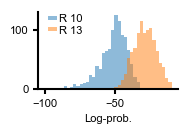

In [48]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.8, 1.0))
    _ = ax.hist(far_out_log_probs_r10.numpy(), bins=40, alpha=0.5, range=(-100,-10))
    _ = ax.hist(r13_log_probs.numpy(), bins=40, alpha=0.5, range=(-100,-10))
    ax.set_xlabel("Log-prob.")
    ax.legend(["R 10", "R 13"], handleheight=0.1, handletextpad=0.2, handlelength=0.8, labelspacing=0.1, loc="upper left", bbox_to_anchor=(0.0, 1.1))
    plt.savefig("../svg/panel_appendix4_c3.svg")

# Assemble figure

In [91]:
import time
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [92]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise
factor_svg=5.5

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

sizefactor = 1.0

f = Figure("15.7cm", "10.0cm",
    Panel(
          SVG("../svg/panel_appendix4_a1.svg").scale(svg_scale),
          Text("Round 5", 89.7, 2, **kwargs_text8pt),
          Text("a", 2.7, 2, **kwargs_text),
    ).move(-1.2, 10),
    Panel(
          SVG("../svg/panel_appendix4_a2.svg").scale(svg_scale),
          Text("Round 10", 79.7, 2, **kwargs_text8pt),
    ).move(190.7, 10),
    Panel(
          SVG("../svg/panel_appendix4_a3.svg").scale(svg_scale),
          Text("Round 13", 79.7, 2, **kwargs_text8pt),
    ).move(380.7, 10),
    
    Panel(
          SVG("../svg/panel_appendix4_b1.svg").scale(svg_scale),
          Text("b", 8.2, 2, **kwargs_text),
    ).move(-6.7, 130),
    Panel(
          SVG("../svg/panel_appendix4_b2.svg").scale(svg_scale),
    ).move(190.7, 130),
    Panel(
          SVG("../svg/panel_appendix4_b3.svg").scale(svg_scale),
    ).move(380.7, 130),
    
    Panel(
          SVG("../svg/panel_appendix4_c1.svg").scale(svg_scale),
          Text("c", 2.8, 2, **kwargs_text),
    ).move(-1.3, 260),
    Panel(
          SVG("../svg/panel_appendix4_c2.svg").scale(svg_scale),
    ).move(200.2, 260),
    Panel(
          SVG("../svg/panel_appendix4_c3.svg").scale(svg_scale),
    ).move(385.7, 260),
)

!mkdir -p fig
f.save("../fig/fig7_appendix4.svg")
svg('../fig/fig7_appendix4.svg')